# Método da Bissecção

O método da bissecção é uma técnica numérica para encontrar raízes de funções contínuas.  
Ele funciona dividindo repetidamente um intervalo em duas partes e selecionando a subparte onde a raiz está localizada.  
Este processo continua até que a raiz seja encontrada com uma precisão desejada.

## Importação das Bibliotecas

In [1]:
!pip install numpy matplotlib tabulate sympy scipy

                                              0.0/12.9 MB ? eta -:--:--
                                              0.1/12.9 MB 2.0 MB/s eta 0:00:07
                                              0.3/12.9 MB 3.3 MB/s eta 0:00:04
     -                                        0.5/12.9 MB 3.6 MB/s eta 0:00:04
     --                                       0.7/12.9 MB 4.3 MB/s eta 0:00:03
     --                                       0.9/12.9 MB 4.5 MB/s eta 0:00:03
     ---                                      1.3/12.9 MB 4.4 MB/s eta 0:00:03
     -----                                    1.7/12.9 MB 5.1 MB/s eta 0:00:03
     ------                                   2.1/12.9 MB 5.6 MB/s eta 0:00:02
     -------                                  2.5/12.9 MB 5.9 MB/s eta 0:00:02
     ---------                                3.0/12.9 MB 6.3 MB/s eta 0:00:02
     ----------                               3.4/12.9 MB 6.5 MB/s eta 0:00:02
     -----------                              3.8/12.9 MB 6


[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import sys
import os

# Obtém o caminho absoluto do diretório do notebook
notebook_dir = os.path.abspath('')

# Adiciona o diretório pai ao sys.path para reconhecer "Graph"
sys.path.append(os.path.join(notebook_dir, '..'))

import numpy as np
import sympy as sp
from tabulate import tabulate
from Graph.graph import plotar_funcao

Matplotlib is building the font cache; this may take a moment.


## Implementação do Método da Bisseção

In [3]:
def bissecao(f, a, b, tol=1e-6):
    """
    Implementa o método da bisseção para encontrar a raiz de uma função.
    
    Parâmetros:
    f  -- Função contínua
    a  -- Extremidade esquerda do intervalo
    b  -- Extremidade direita do intervalo
    tol -- Tolerância para o erro (padrão: 1e-6)
    
    Retorna:
    raiz aproximada e tabela com as iterações
    """
    if f(a) * f(b) >= 0:
        raise ValueError("O intervalo não contém uma raiz ou possui múltiplas raízes.")
    
    max_iter = int(np.ceil(np.log2((b - a) / tol)))
    iter = 0
    tabela = []
    raiz_anterior = None
    
    while True:
        c = (a + b) / 2
        erro_absoluto = round(abs(c - raiz_anterior), 4) if raiz_anterior is not None else None
        erro_relativo = abs((c - raiz_anterior) / c) if raiz_anterior is not None else None
        tabela.append([iter, a, b, c, f(c), abs(b - a), erro_absoluto, erro_relativo])
        raiz_anterior = c
        iter += 1
        
        if erro_relativo and erro_relativo < tol:
            break
        
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    return c, tabela, max_iter

## Aplicação do Método

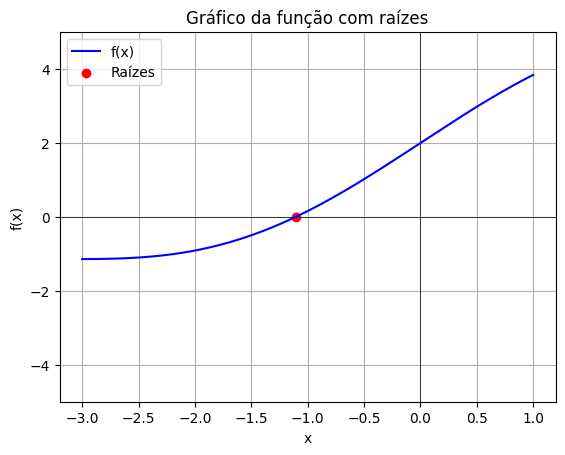

  Iteração         a         b         c      f(c)     Erro    Erro Absoluto    Erro Relativo
----------  --------  --------  --------  --------  -------  ---------------  ---------------
         0  -2.00000   0.00000  -1.00000   0.15853  2.00000
         1  -2.00000  -1.00000  -1.50000  -0.49749  1.00000          0.50000          0.33333
         2  -1.50000  -1.00000  -1.25000  -0.19898  0.50000          0.25000          0.20000
         3  -1.25000  -1.00000  -1.12500  -0.02727  0.25000          0.12500          0.11111
         4  -1.12500  -1.00000  -1.06250   0.06393  0.12500          0.06250          0.05882
         5  -1.12500  -1.06250  -1.09375   0.01790  0.06250          0.03120          0.02857
         6  -1.12500  -1.09375  -1.10938  -0.00480  0.03125          0.01560          0.01408
         7  -1.10938  -1.09375  -1.10156   0.00652  0.01562          0.00780          0.00709
         8  -1.10938  -1.10156  -1.10547   0.00086  0.00781          0.00390          0.00353


In [5]:
# Entrada do usuário
x = sp.Symbol('x')
expressao = input("Digite a função em termos de x (ex: sin(x) + exp(x)): ")
funcao = sp.lambdify(x, sp.sympify(expressao), 'numpy')

a = float(input("Digite o limite inferior do intervalo: "))
b = float(input("Digite o limite superior do intervalo: "))
tol = float(input("Digite o limite de erro: "))

plotar_funcao(funcao, a, b)

# Aplicando o método da bisseção
raiz, tabela, max_iter = bissecao(funcao, a, b, tol)

# Exibindo resultados
print(tabulate(tabela, headers=["Iteração", "a", "b", "c", "f(c)", "Erro", "Erro Absoluto", "Erro Relativo"], floatfmt=".5f"))
print(f"Raiz aproximada: {raiz:.4f}")
print(f"Máximo de Iterações: {max_iter}")

### Prova RAIZES semestre passado

- Questão 1:
    - a - 0.0054
    - b - 0.6520 => CORRETO
    - c - 7 => CORRETO

=====================================================

- Questão 2:
    - a - -1.1060 => CORRETO
    - b - -1.1061, 0.0000 => CORRETO
    - c - -1.1061, 0.0000 => 
    - d - ATENÇÃO PARA AJUSTAR DIVISÃO POR 0 SECANTE

=====================================================

Questão 3:

OBS TO DO: Melhorar gráfico para marcar as raizes na curva, consertar jacobi e seidel